<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter2_Introduction_to_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduce to Computer Vision
Ở chương này chúng mình sẽ cùng tìm hiểu về thị giác máy tính nha.

Mọi người có thể hiểu đơn giản, thị giác máy có nghĩa là máy tính có thể nhìn và phân tích, hiểu được những gì chúng nhìn thấy.

Ở chương này tụi mình sẽ bắt đầu đơn giản bằng một dự án về nhận diện đồ vật, quần áo. <br>Bộ dữ liệu mà chúng mình sử dụng lần này là [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

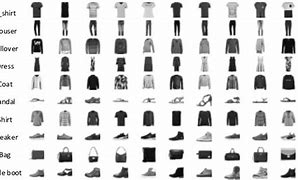

# Mô hình cơ bản

## Khởi tạo và tiền xử lý dữ liệu.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


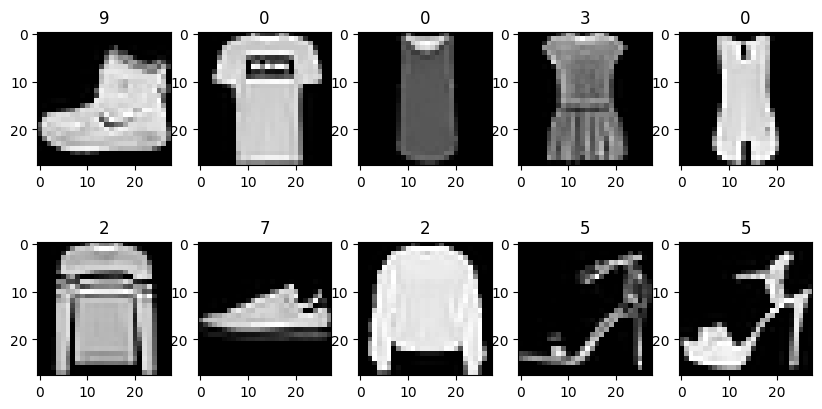

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Tiến hành lấy dữ liệu về từ bộ dữ liệu của Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Trực quan hóa 10 ảnh đầu tiên lên cùng với nhãn của chúng
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_images[i], cmap = 'gray')
    axs[i].set_title(train_labels[i])
plt.show()


Như các bạn có thể thấy, các nhãn hiện tại đều được đặt dưới dạng số. Đây là bảng liệt kê các nhãn tương ứng số của dữ liệu mà mình tìm được trên minist.

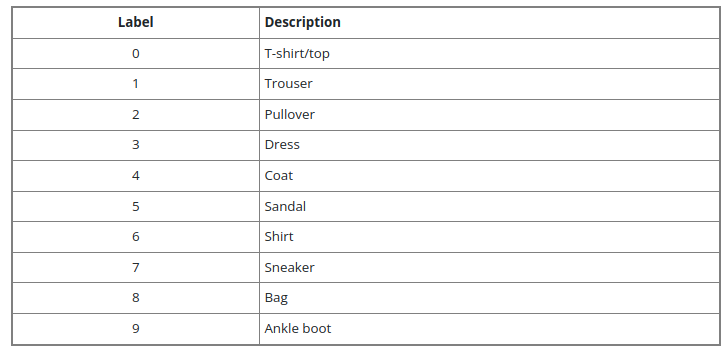

Do đó, mình sẽ tiến hành tạo một danh sách tên của các nhãn để mapping cho chúng.

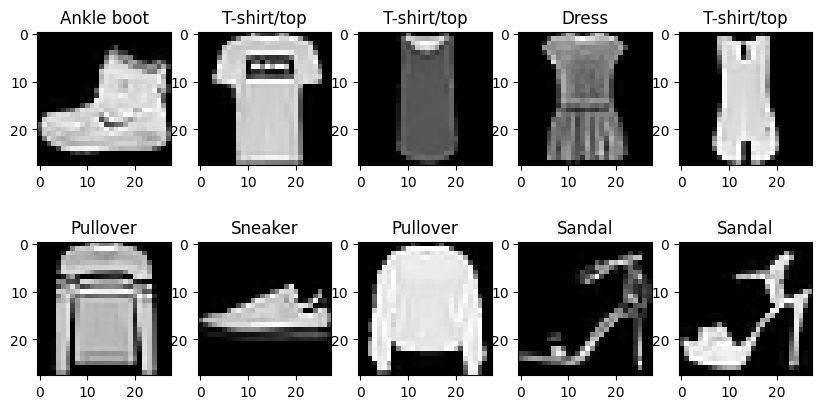

In [2]:
# Khởi tạo danh sách mapping cho các nhãn.
idx2label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']\

# Tiến hành trực quan hóa lại với tên nhãn.
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_images[i], cmap = 'gray')
    axs[i].set_title(idx2label[train_labels[i]])
plt.show()

In [3]:
# Xem kích thước các bức ảnh
img1 = train_images[0]
shape_img1 = img1.shape
print('Kích thước ảnh(pixel): ',shape_img1)

# Xem giá trị pixel lớn nhất của bức ảnh hiện tại.
print('Giá trị pixel lớn nhất: ', np.max(img1))

# Xem giá trị pixel nhỏ nhất của bức ảnh hiện tại.
print('Giá trị pixel nhỏ nhất: ', np.min(img1))

Kích thước ảnh(pixel):  (28, 28)
Giá trị pixel lớn nhất:  255
Giá trị pixel nhỏ nhất:  0


Như mọi người có thể thấy ở đây thì độ lớn giá trị của các pixels sẽ nằm trong khoảng [0 - 255].

Mọi người đưa vào huấn luyện mô hình cũng được thôi nhưng giá trị lớn đòi hỏi việc tính toán sẽ tốn nhiều thời gian và lâu hơn, chưa kể độ sai sót cũng sẽ lớn.

Do đó chúng ta sẽ tiến hành chuẩn hóa giá trị của chúng về  trong khoảng [0 - 1] để mô hình có thể học được hiệu quả hơn.

In [4]:
# Chuẩn hóa giá trị pixel của các ảnh, chúng mình sẽ tiến hành chia tất cả giá trị cho 255.
train_images = train_images / 255
test_images = test_images / 255

## Khởi tạo mô hình.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.nn import relu, softmax

# Khởi tạo kiến trúc mô hình
model = Sequential()

# Ở đây mình có sử dụng một cú pháp khác thay vì truyền vào danh sách các lớp
# mọi người cũng có thể thêm các lớp vào mô hình như vậy nha.
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = relu))
model.add(Dense(10, activation = softmax)) # Fully connected.

# Định nghĩa hàm tối ưu và hàm mất mát.
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Ở kiến trúc mô hình lần này, mình sẽ nâng cấp nó lên một tí nha.

Đầu tiên là về lớp **Flatten()**

> model.add(Flatten(input_shape = (28, 28)))

Hàm này được sử dụng để trải phẳng hình ảnh ra. Hình ảnh hiện tại của chúng ta là dạng 2 chiều (2D) thì chúng ta sẽ trải nó ra thành dạng 1 chiều (1D), điều này giúp việc đưa vào lớp tuyến tính trở nên dễ dàng hơn.

---------------------------------------------------

Tiếp đên là lớp tuyến tính này, chúng ta sẽ gặp một định nghĩa mới là hàm kích hoạt. Ở đây mình sử dụng là **Relu**
> model.add(Dense(128, activation = relu))

Mọi người cứ hiểu đơn giản là chúng sẽ thay đổi các giá trị đầu ra, từ đó giảm được các tình trạng xấu có thể gặp phải trong quá trình huấn luyện. Hàm **Relu** này sẽ chuyển các giá trị về khoảng [0 - 1], tức là các số dương giữ nguyên và số âm thì trả về 0.

--------------------------------------------------

Lớp cuối cùng của chúng ta cũng là một lớp tuyến tính, tuy nhiên sẽ có hàm kích hoạt là **Softmax**.

> model.add(Dense(10, activation = softmax))

Hàm **Softmax** này thường được sử dụng trong các bài toàn nhiều nhãn, với kết quả trả ra sẽ là xác suất đúng của các nhãn.

Thông thường trong các bài toán, lớp cuối cùng này mọi người hay gọi là **lớp kết nối đầy đủ** hay **fully connected**

===================================================

Hàm tối ưu và mất mát.

Ở đây mình sử dụng hàm tối ưu là **Adam**, nó sẽ khắc phục được những hạn chế của **Gradient descent** từ việc có thể tự điều chỉnh chỉ số tự học (learning rate)

Hàm mất mát mình sử dụng là **Sparse categorical cross entropy**, mình cũng không biết dịch ra tiếng Việt như nào nữa, nhưng hiểu đơn giản là với các bài toán phân loại đa nhãn thì chúng ta sẽ sử dụng dạng **Categorical cross entropy**.

Lưu ý: Với nhãn dùng để huấn luyện, nếu là dạng 1 số nguyên thì ta dùng **sparse_categorical_crossentropy**, còn với dạng one-hot-encoding (vd: [1, 0, 0]) thì ta sử dụng **categorical_crossentropy**




## Huấn luyện và đánh giá mô hình

In [6]:
# Huần luyện mô hình và lưu lại quá trình trên biến history
history = model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7840 - loss: 0.6266
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8604 - loss: 0.3832
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.3415
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8842 - loss: 0.3137
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8898 - loss: 0.2926


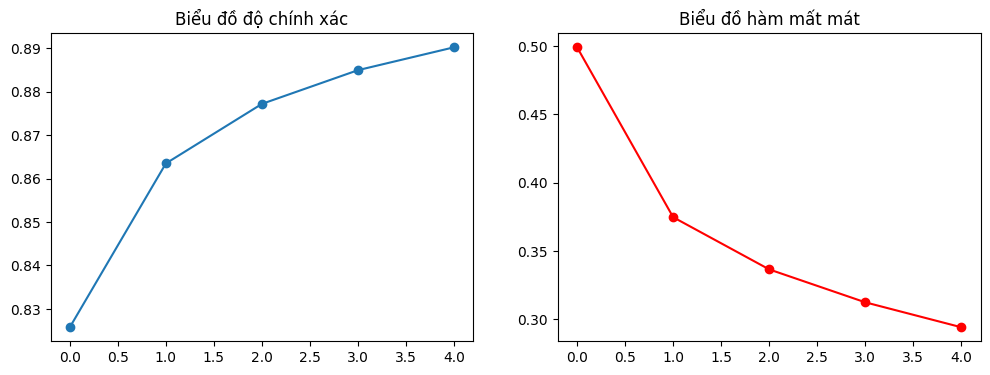

In [7]:
# Vẽ 2 biểu đồ quá trình huấn luyện mô hình dựa trên accuracy và loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history.history['accuracy'], marker = 'o')
axs[0].set_title('Biểu đồ độ chính xác')
axs[1].plot(history.history['loss'], marker = 'o', color = 'red')
axs[1].set_title('Biểu đồ hàm mất mát')
plt.show()

In [14]:
# Kết quả đánh giá cuối cùng của mô hình sau khi train xong
train_acc = history.history['accuracy'][-1]
print("Độ chính xác trên tập huấn luyện: ", train_acc)
train_loss = history.history['loss'][-1]
print("Độ mất mát trên tập huấn luyện: ", train_loss)

Độ chính xác trên tập huấn luyện:  0.890250027179718
Hàm mất mát trên tập huấn luyện:  0.2940859794616699


In [8]:
# Đánh giá mô hình trên tập kiểm tra
result = model.evaluate(test_images, test_labels)
print("Kết quả đánh giá mô hình: ", result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8735 - loss: 0.3472
Kết quả đánh giá mô hình:  [0.352588027715683, 0.8707000017166138]


Mọi người có thể thấy kết quả trả về sau hàm đánh giá là một danh sách. Tuy nhiên nếu coi vậy không thì sẽ rất khó hiểu nên ta sẽ đi tìm xem chúng dựa trên thước đo gì.

In [9]:
# Hàm lấy tên các thước đo
metrics = model.metrics_names
# In lại kết quả đánh giá
for i, m in enumerate(metrics):
  print(f"Kết quả đánh giá dựa trên {m}: {result[i]}")

Kết quả đánh giá dựa trên loss: 0.352588027715683
Kết quả đánh giá dựa trên compile_metrics: 0.8707000017166138


In [ ]:
# Xem thử kết quả dự đoán, ở đây mình sẽ lấy ảnh thứ nhất trong tập test
img_test = test_images[0]
plt.imshow(img_test, cmap = 'gray')
plt.show()

predicted = model.predict(img_test)
print("Kết quả dự đoán: ", predicted)

# Chuyển đổi vector dự đoán về dạng nhãn
idx_label =  np.argmax(predicted)
print("Nhãn dự đoán: ", idx2label[idx_label])
print("Nhãn thực tế: ", idx2label[test_labels[0]])

#### Tuy là chỉ với 5 epochs nhưng mọi người cũng có thể thấy là kết quả đã khá tốt rồi, trên 80%. Bây giờ chúng ta sẽ tạo lại một model khác và sô epochs là 50 để xem mô hình hiệu quả hơn như thế nào.


# Khởi tạo mô hình với số  epochs huấn luyện là 50.

In [10]:
# Khởi tạo kiến trúc mô hình
model1 = Sequential()

# Ở đây mình có sử dụng một cú pháp khác thay vì truyền vào danh sách các lớp
# mọi người cũng có thể thêm các lớp vào mô hình như vậy nha.
model1.add(Flatten(input_shape = (28, 28)))
model1.add(Dense(128, activation = relu))
model1.add(Dense(10, activation = softmax)) # Fully connected.

# Định nghĩa hàm tối ưu và hàm mất mát.
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# Huần luyện mô hình và lưu lại quá trình trên biến history
history1 = model1.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7818 - loss: 0.6186
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.3860
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8758 - loss: 0.3400
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8843 - loss: 0.3164
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8924 - loss: 0.2950
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8984 - loss: 0.2736
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9003 - loss: 0.2721
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9034 - loss: 0.2604
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9087 - loss: 0.2418
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9112 - loss: 0.2336
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9145 - loss: 0.2289
Epoch 12/50
1875/1875 ━━━━━━━━

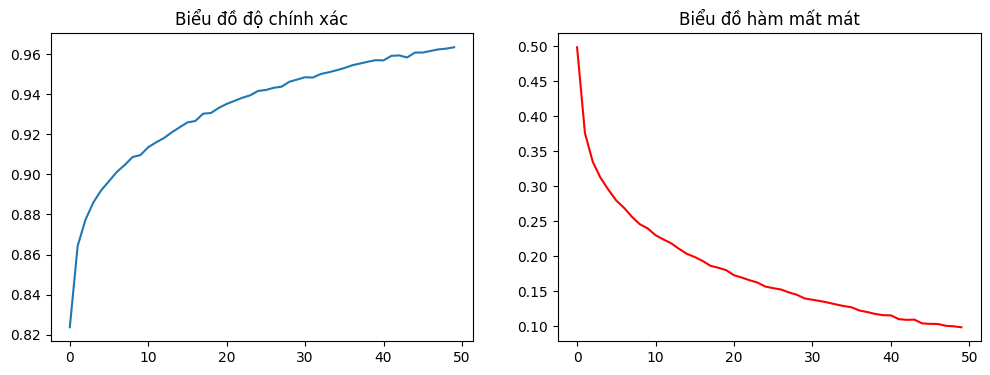

In [12]:
# Vẽ 2 biểu đồ quá trình huấn luyện mô hình dựa trên accuracy và loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history1.history['accuracy'])
axs[0].set_title('Biểu đồ độ chính xác')
axs[1].plot(history1.history['loss'], color = 'red')
axs[1].set_title('Biểu đồ hàm mất mát')
plt.show()

In [15]:
# Kết quả đánh giá cuối cùng của mô hình sau khi train xong
train_acc = history1.history['accuracy'][-1]
print("Độ chính xác trên tập huấn luyện: ", train_acc)
train_loss = history1.history['loss'][-1]
print("Độ mất mát trên tập huấn luyện: ", train_loss)

Độ chính xác trên tập huấn luyện:  0.9633166790008545
Độ mất mát trên tập huấn luyện:  0.09824053198099136


In [13]:
# Đánh giá mô hình
result1 = model1.evaluate(test_images, test_labels)
print("Kết quả đánh giá mô hình: ", result1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8877 - loss: 0.5318
Kết quả đánh giá mô hình:  [0.5277907848358154, 0.8860999941825867]


In [16]:
# Hàm lấy tên các thước đo
metrics1 = model1.metrics_names
# In lại kết quả đánh giá
for i, m in enumerate(metrics1):
  print(f"Kết quả đánh giá dựa trên {m}: {result1[i]}")

Kết quả đánh giá dựa trên loss: 0.5277907848358154
Kết quả đánh giá dựa trên compile_metrics: 0.8860999941825867


Kết quả đánh giá của các bạn đôi khi trở nên tốt hơn, nhưng cũng có thể là tệ hơn. Điều này có vẻ khá là hoang mang cho người mới. Tuy nhiên đừng quá lo lắng, bạn sẽ gặp điều này thường xuyên thôi.

Trong lần chạy của tối, có vẻ kết quả đã khả quan hơn rất nhiều:

- Khi được huấn luyện trên 5 epochs:
> Độ chính xác trên tập huấn luyện:  0.890250027179718<br>
Độ mất mát trên tập huấn luyện:  0.2940859794616699
<br><br>
Độ chính xác trên tập kiểm tra: 0.8707000017166138
<br>Độ mất mát trên tập kiểm tra: 0.352588027715683


- Khi được huấn luyện trên 50 epochs:
> Độ chính xác trên tập huấn luyện:  0.9633166790008545<br>
Độ mất mát trên tập huấn luyện:  0.09824053198099136<br><br>
Độ chính xác trên tập kiểm tra: 0.8860999941825867<br>
Độ mất mát trên tập kiểm tra: 0.5277907848358154

Trong một vài trường hợp khác, mô hình có thể tệ hơn nhiều, lúc này chúng ta sẽ xét đến hai khái niệm là **overfitting** và **underfitting**:

- Hiểu đơn giản là khi kết quả đánh giá trên tập kiểm tra tệ hơn nhiều so với tập huấn luyện, độ chính xác trên tập huấn luyện cao trong khi trên tập kiểm ta lại vô cùng thấp, ta gọi tình trạng này là **overfitting**

- Còn khi trên kết quả đánh giá cả trên tập huấn luyện và tập kiểm tra đều vô cùng tệ, lúc này ta gọi là **underfitting**

# Huấn luyện model với việc sử dụng phương pháp dừng sớm (early_stopping).
Trong một số trường hợp, việc huấn luyện mô hình nhiều đôi khi lại không hiệu quả và có thể dẫn đến **overfitting**. Do đó ta sẽ sử dụng phương pháp trên để dừng sớm quá trình huấn luyện thay vì chạy hết toàn bộ, giúp tiết kiệm thời gian và tài nguyên hơn.

Nguyên lý hoạt động của "dừng sớm" rất đơn giản, nếu trong n lần huấn luyện liên tiếp, mô hình không cải thiện thì tiến hành dừng lại quá trình huấn luyện và lấy ra mô hình tốt nhất.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Khởi tạo EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Giám sát lỗi trên tập validation
    patience=5,                # Số epoch tối đa không cải thiện để dừng huấn luyện
    restore_best_weights=True  # Khôi phục lại mô hình tốt nhất
)

# Khởi tạo kiến trúc mô hình
model2 = Sequential()

# Ở đây mình có sử dụng một cú pháp khác thay vì truyền vào danh sách các lớp
# mọi người cũng có thể thêm các lớp vào mô hình như vậy nha.
model2.add(Flatten(input_shape = (28, 28)))
model2.add(Dense(128, activation = relu))
model2.add(Dense(10, activation = softmax)) # Fully connected.

# Định nghĩa hàm tối ưu và hàm mất mát.
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Huấn luyện mô hình với callback EarlyStopping
history2 = model2.fit(
    train_images,
    train_labels,
    epochs=50,
    validation_data=(test_images, test_labels),  # Thêm dữ liệu validation, vì ở đây mình không chia val nên tạm lấy test
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7802 - loss: 0.6311 - val_accuracy: 0.8498 - val_loss: 0.4238
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8622 - loss: 0.3862 - val_accuracy: 0.8594 - val_loss: 0.3864
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.3401 - val_accuracy: 0.8693 - val_loss: 0.3676
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8857 - loss: 0.3124 - val_accuracy: 0.8628 - val_loss: 0.3764
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8922 - loss: 0.2937 - val_accuracy: 0.8739 - val_loss: 0.3468
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8995 - loss: 0.2735 - val_accuracy: 0.8726 - val_loss: 0.3484
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9029 - loss: 0.2645 - val_accuracy: 0.8756 - val_loss: 0.3488
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9071 - loss: 0.2505 - 

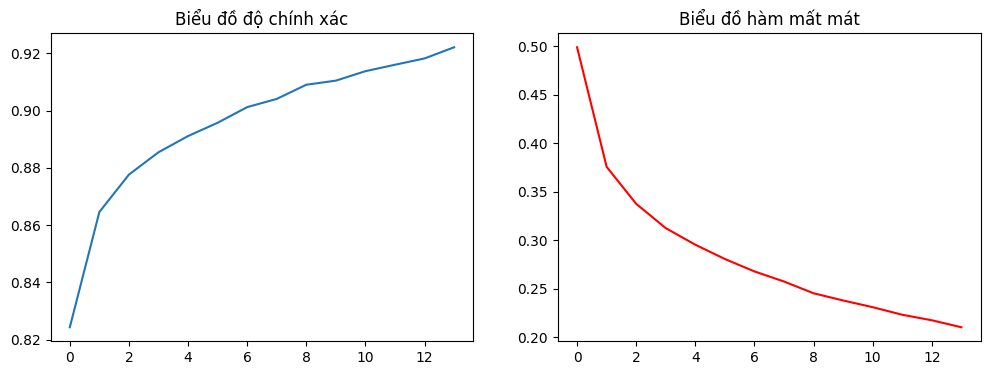

In [18]:
# Vẽ 2 biểu đồ quá trình huấn luyện mô hình dựa trên accuracy và loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history2.history['accuracy'])
axs[0].set_title('Biểu đồ độ chính xác')
axs[1].plot(history2.history['loss'], color = 'red')
axs[1].set_title('Biểu đồ hàm mất mát')
plt.show()

In [19]:
# Kết quả đánh giá cuối cùng của mô hình sau khi train xong
train_acc = history2.history['accuracy'][-1]
print("Độ chính xác trên tập huấn luyện: ", train_acc)
train_loss = history2.history['loss'][-1]
print("Độ mất mát trên tập huấn luyện: ", train_loss)

Độ chính xác trên tập huấn luyện:  0.92208331823349
Độ mất mát trên tập huấn luyện:  0.21005778014659882


In [20]:
# Đánh giá mô hình trên tập kiểm tra
result2 = model2.evaluate(test_images, test_labels)
print("Kết quả đánh giá mô hình: ", result2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8819 - loss: 0.3386
Kết quả đánh giá mô hình:  [0.3378709554672241, 0.8828999996185303]


In [21]:
# Hàm lấy tên các thước đo
metrics2 = model2.metrics_names
# In lại kết quả đánh giá
for i, m in enumerate(metrics2):
  print(f"Kết quả đánh giá dựa trên {m}: {result2[i]}")

Kết quả đánh giá dựa trên loss: 0.3378709554672241
Kết quả đánh giá dựa trên compile_metrics: 0.8828999996185303


#### Đây là kết qủa trong trường hợp của mình.
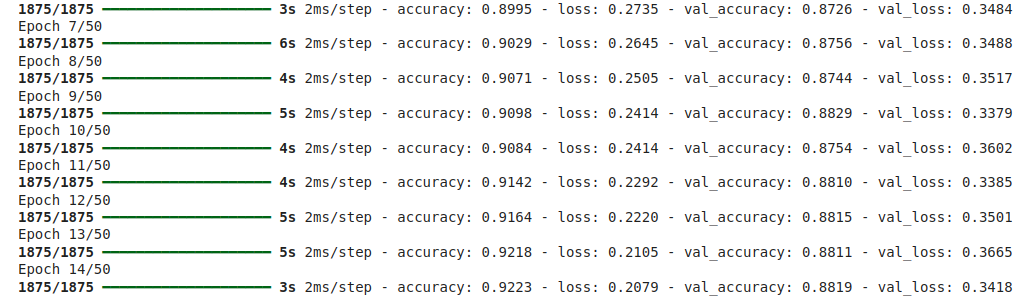

Bạn có thể thấy rằng từ **epoch 9** đến **epoch 14**, giá trị **val_loss** không giảm liên tục và dao động xung quanh giá trị từ 0.3379 đến 0.3665. Điều này cho thấy rằng mô hình không còn cải thiện rõ ràng độ mất mát trên tập val(trong trường hợp của chúng ta là test) tại epochs từ [10-14] nữa. Kết quả **val_loss** ở **epoch 9** không còn giảm nữa do đó ta dừng quá trình huấn luyện và chọn mô hình tốt nhất ở tại **epoch 9**.